This code is written to train and test YOLOv3 Model for Object Detection on Custom Datasets of Toys Images on Google Colab.

Clone darknet from AlexeyAB's famous repository.

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


I# change makefile to have GPU and OPENCV enabled

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
pwd

'/content/darknet'

In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-23 12:03:36--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   147KB/s    in 27m 9s  

2020-04-23 12:30:47 (149 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# imshow def is only used in this program

def imshow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width,3*height),interpolation=cv2.INTER_CUBIC)

  plt.figure(figsize=(18,10))
  plt.imshow(cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB))
  plt.show()

  
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name,'wb') as f:
      f.write(data)
      print("file saved", name)

def download(path):
  from google.colab import files
  files.download(path)


Now test the model


!./darknet detect <.cfg file> <.weight file> <.jpg test image file> -thresh 0.3 <.thresh is optional>

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

/bin/bash: ./darknet: Is a directory


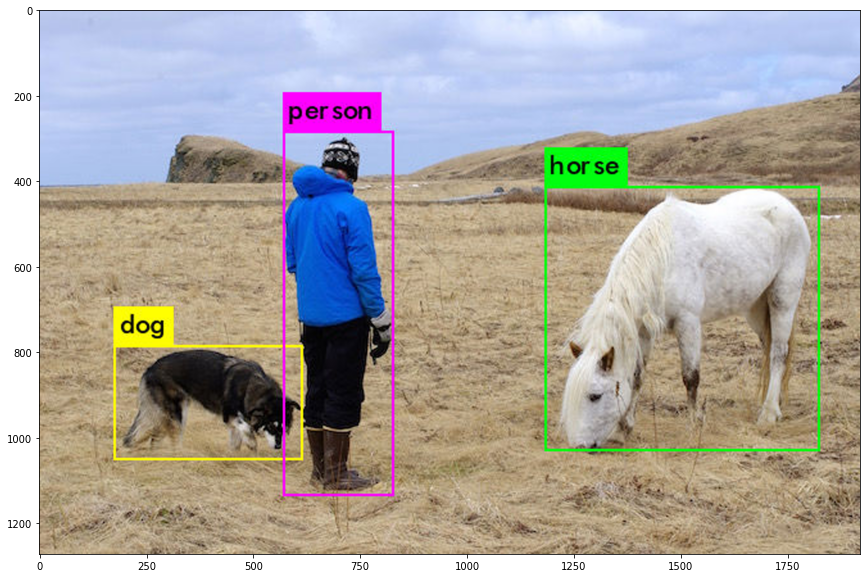

In [ ]:
imshow("predictions.jpg")

Now Train and Test YOLOv3 Model on Custom Data of Images - Toys.

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /my_drive
!ls /my_drive

ln: failed to create symbolic link '/my_drive/My Drive': Function not implemented
 AI					  'Getting started.pdf'
 BOM.xlsx				  'Rate List.pdf'
 BOM.xlsx.gsheet			  'RICERCA ENTERPRISES.PDF'
'Colab Notebooks'			  'TAEHWA C Fans Specification .xlsx'
'Customer Profiling Form (2).xls'	   VIPUL_DIM-ME_Edit-2.mp4
'Customer Profiling Form (2).xls.gsheet'   yolov3
'Document from Vipul Becil'


In [ ]:
pwd

'/content/darknet'

Download pretrained model which is trained from yolo website

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-04-23 13:30:37--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   168KB/s    in 16m 21s 

2020-04-23 13:47:00 (162 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



Now upload "custom_data" folder on your google drive. The following cell will unzip inside of darknet which will create custom_data folder

In [ ]:
!unzip /my_drive/yolov3/custom_data.zip -d /content/darknet/

Archive:  /my_drive/yolov3/custom_data.zip
   creating: /content/darknet/custom_data/
  inflating: /content/darknet/custom_data/create_image_path.ipynb  
  inflating: /content/darknet/custom_data/.DS_Store  
   creating: /content/darknet/__MACOSX/
   creating: /content/darknet/__MACOSX/custom_data/
  inflating: /content/darknet/__MACOSX/custom_data/._.DS_Store  
   creating: /content/darknet/custom_data/images/
  inflating: /content/darknet/custom_data/images/.DS_Store  
   creating: /content/darknet/__MACOSX/custom_data/images/
  inflating: /content/darknet/__MACOSX/custom_data/images/._.DS_Store  
   creating: /content/darknet/custom_data/images/test/
  inflating: /content/darknet/custom_data/images/test/IMG20200405222729.txt  
   creating: /content/darknet/__MACOSX/custom_data/images/test/
  inflating: /content/darknet/__MACOSX/custom_data/images/test/._IMG20200405222729.txt  
  inflating: /content/darknet/custom_data/images/test/IMG20200405154300.jpg  
  inflating: /content/darknet

Final command to start tarining on yolo 

In [ ]:
!./darknet detector train custom_data/colab_detector.data custom_data/cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.843494, GIOU: 0.841490), Class: 0.999676, Obj: 0.987275, No Obj: 0.003374, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.000645, iou_loss = 0.079171, total_loss = 0.079817 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000027, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.882943, GIOU: 0.879317), Class: 0.999486, Obj: 0.996503, No Obj: 0.003444, .5R: 1.000000, .75R: 1.000000, count: 4,

In [ ]:
# To restart tarining from last trained weight saved in google drive
#!./darknet detector train custom_data/colab_detector.data custom_data/cfg/yolov3_custom.cfg /my_drive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [ ]:
!rm -r /content/darknet/__MACOSX

In [ ]:
!rm -r /content/darknet/custom_data

In [ ]:
pwd

'/content/darknet'

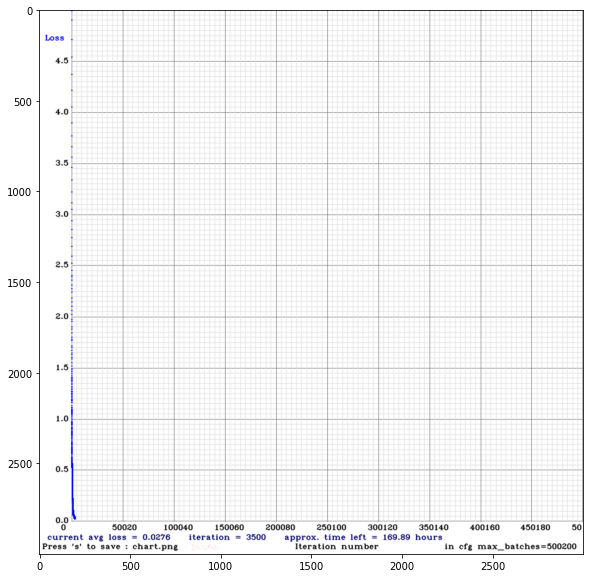

In [ ]:
# Training Log
imshow('/content/darknet/chart.png')

In [ ]:
%cd darknet

/content/darknet


In [ ]:
pwd

'/content/darknet'

In [ ]:
# change cfg file for testing the image

%cd custom_data/cfg
!sed -i 's/batch=16/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=4/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/custom_data/cfg
/content/darknet/custom_data


In [ ]:
%cd ..

/content/darknet


In [ ]:
pwd

'/content/darknet'

!./darknet detector test <.data file> <.cfg file> <.weights file> <.jpg image file> -thresh 0.3


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

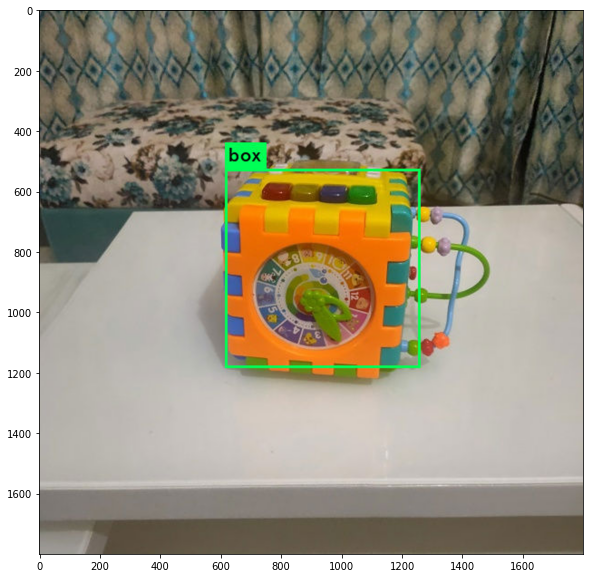

In [ ]:
#run and test the model which you got inside google drive 
!./darknet detector test custom_data/colab_detector.data custom_data/cfg/yolov3_custom.cfg /my_drive/yolov3/backup/yolov3_custom_last.weights /content/darknet/custom_data/images/test/IMG20200405195254.jpg -thresh 0.3
imshow('/content/darknet/predictions.jpg')

Thanks

VIPUL KAMBOJ